## BUAN6341.003 Applied Machine Learning Assigment 3 submitted by:          Pingili Lohith

#### In this assignment, the follwing two algorithms are implemented on two datasets:
1. K Nearest Neighbours
2. Artificial Neural Networks

About the datasets: 
1. First dataset is  Online News Sharing dataset available for download at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity# .The goal is to predict the number of time an article is shared based on features like number of images, number of videos, day of publication, type of article, referenced article shares etc. By converting the shares variable to a class variable based on median values, we try to classify an article being shared or not  based on the above features. Classification of this kind is interesting as it can help in revenue generation.
2. Second data is Adult dataset available for download at https://archive.ics.uci.edu/ml/datasets/Census+Income, a clean version of which available at https://github.com/udacity/machine-learning/tree/master/projects/finding_donors is used. The goal is to predict whether income exceeds 50K/yr based on census data based on features like sex, education type, years of education, relationship status, race etc. By converting the income variable to a class variable based on >50k/yr and <=50k/yr , we try to classify whether the person's income exceeds $50k/yr. This kind of classification can be of interest to  a non-profit organisation, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.

The procedure followed in the implementation of these algorithms is as follows:
1. Converted the decision variable to two classes.
2. Divided the data into train and test sets.
3. Implemented the three algorithms on both datasets.
4. For KNN algorithm, experimented with differernt hyperparameters such as number of neighbours, distance, algorithms and weights, and compiled a dataframe containing time taken, accuracy score and error for both train and test data with variation in hyperparameters. Plotted error rates vs train data size, error rates vs clock time, evaluation metric vs hyper parameter.
5. For Artificial Neural Networks algorithm, experimented with hyperparameters such as number of nodes in hidden layer, batch size, epochs ,activation function and optimizer, and complied a dataframe containing time taken, accuracy score and error for both train and test data with variation in hyperparameters. Plotted error rates vs train data size, error rates vs clock time, evaluation metric vs hyper parameter. 
6. Evaluated the best training parameters for each dataset based on accuracy score.

Libraries used: pandas, numpy, scikitlearn, keras, seaborn and matplotlib

**NOTE: nodes refer to number of neurons in hidden layer**

#### KNN Experimentation Explanations:
1. Distance metric: Experimented with two distance metrics - Euclidean and Manhanttan to find which is more appropriate for the given problem
2. Weights metric:  Experimented with uniform and 'distance' - To see how the model performs when the nearest neighbour has greater influence than neighbours far away
3. Algorithm: Auto, Brute and ball_tree were experimented with in the first dataset where as in the second dataset brute was not used as it was very computationally expensive.


#### ANN Experimentation Explanations:
1. Nodes: The optimum number of nodes (reference provided at the end) is the mean of number of input dimensions and output dimensions. So experimentation was done with mean-10, mean and mean+10 number of nodes,
2. Number of Hidden layers: From the same above reference, one hidden layer is enough to model almost any type of data. So only one hidden layer was used in the experimentation.
3. Activation Functions: tanh, sigmoid and relu was experimented with t find the most appropriate for each dataset.
4. Batch Sizes: In addition to default batch size of 32, 64 was also experimented with as these are multiples of 2 and thus have better memory management.
5. Number of Epochs: Only 10,20,30 epochs were experimented with as more number of epochs are computationally expensive.

## Dataset 1

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df1=pd.read_csv('OnlineNewsPopularity.csv')

In [39]:
df1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [40]:
shares=df1['shares']
features=df1.drop(['url','timedelta','shares'],axis=1)
features = (features - features.mean()) / (features.max() - features.min()) #Normalisation of data

### Task1 : conversion of shares to two classes based on median value

In [41]:
#Creation of binary variable for shares based on median.
median_shares=np.median(shares)
shares_ind=[]
for share in shares:
    if share>= median_shares:
        shares_ind.append(1)
    else:
        shares_ind.append(0)
shares=pd.DataFrame(shares_ind)
shares=np.ravel(shares)

### Task2 : Division of data into test and train sets 

In [42]:
# Splitting data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, shares, test_size=0.3, random_state=123)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Implementation of KNN with default parameters

In [44]:
import time
time_start=time.clock()
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
time_elapsed = (time.clock() - time_start)
print(accuracy, time_elapsed)

0.5954262653438709 32.22152943589754


In [45]:
def knn(n,weight,algo,metric,X_train,y_train,X_test,y_test):
    import time
    time_start=time.clock()
    model1=KNeighborsClassifier(n_neighbors = n, weights = weight, algorithm = algo, p = metric )
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    neighbours.append(n)
    weight_function.append(weight)
    algo_type.append(algo)
    dist_metric.append(metric)
    print(n,weight,algo,metric,S_test,time_elapsed)

#### Experimentation of KNN with n=[1,2,5,10,15,25,50,100] weights=['uniform','distance' algorithms=['auto','brute'] metrics = [1,2]

In [46]:
n=[1,2,5,10,15,25,50,100]
weights=['uniform','distance']
algorithms=['auto','brute']
metrics = [1,2]
train_score=[]
test_score=[]
time_taken=[]
neighbours=[]
weight_function=[]
algo_type=[]
dist_metric=[]
for n in n:
    for weight in weights:
        for algo in algorithms:
            for metric in metrics:
                knn(n,weight,algo,metric,X_train,y_train,X_test,y_test)
df1_knn=pd.DataFrame()
df1_knn['no_neighbours']=neighbours
df1_knn['weight_function']=weight_function
df1_knn['algo_type']=algo_type
df1_knn['dist_metric']=dist_metric
df1_knn['train_score']=train_score
df1_knn['test_score']=test_score
df1_knn['train_error']=1-df1_knn['train_score']
df1_knn['test_error']=1-df1_knn['test_score']
df1_knn['time']=time_taken

In [47]:
df1_knn['time'].sum()

5020.809707487175

#### DataFrame containing the top 5 accuracy scores.

In [48]:
(df1_knn.sort_values(by='test_score',ascending=False)).head(5)

,no_neighbours,weight_function,algo_type,dist_metric,train_score,test_score,train_error,test_error,time
52,50,distance,auto,1,1.000000,0.640155,0.000000,0.359845,141.628521
54,50,distance,brute,1,1.000000,0.640155,0.000000,0.359845,73.523396
62,100,distance,brute,1,1.000000,0.639566,0.000000,0.360434,70.811157
60,100,distance,auto,1,1.000000,0.639566,0.000000,0.360434,145.258931
48,50,uniform,auto,1,0.654378,0.638053,0.345622,0.361947,141.178907


#### Findings
1. Though the best accuracy is 64.0155, the corresponding train accuracy is 100 which implies overfitting.
2. The next best test accuracy is 63.80 with hyper paramters of 40 neighbours, uniform weight function, auto and dist metric 1. The best test_score took a computational time of 141 secs.

#### Graphs containing comparisions of various hyper parameters

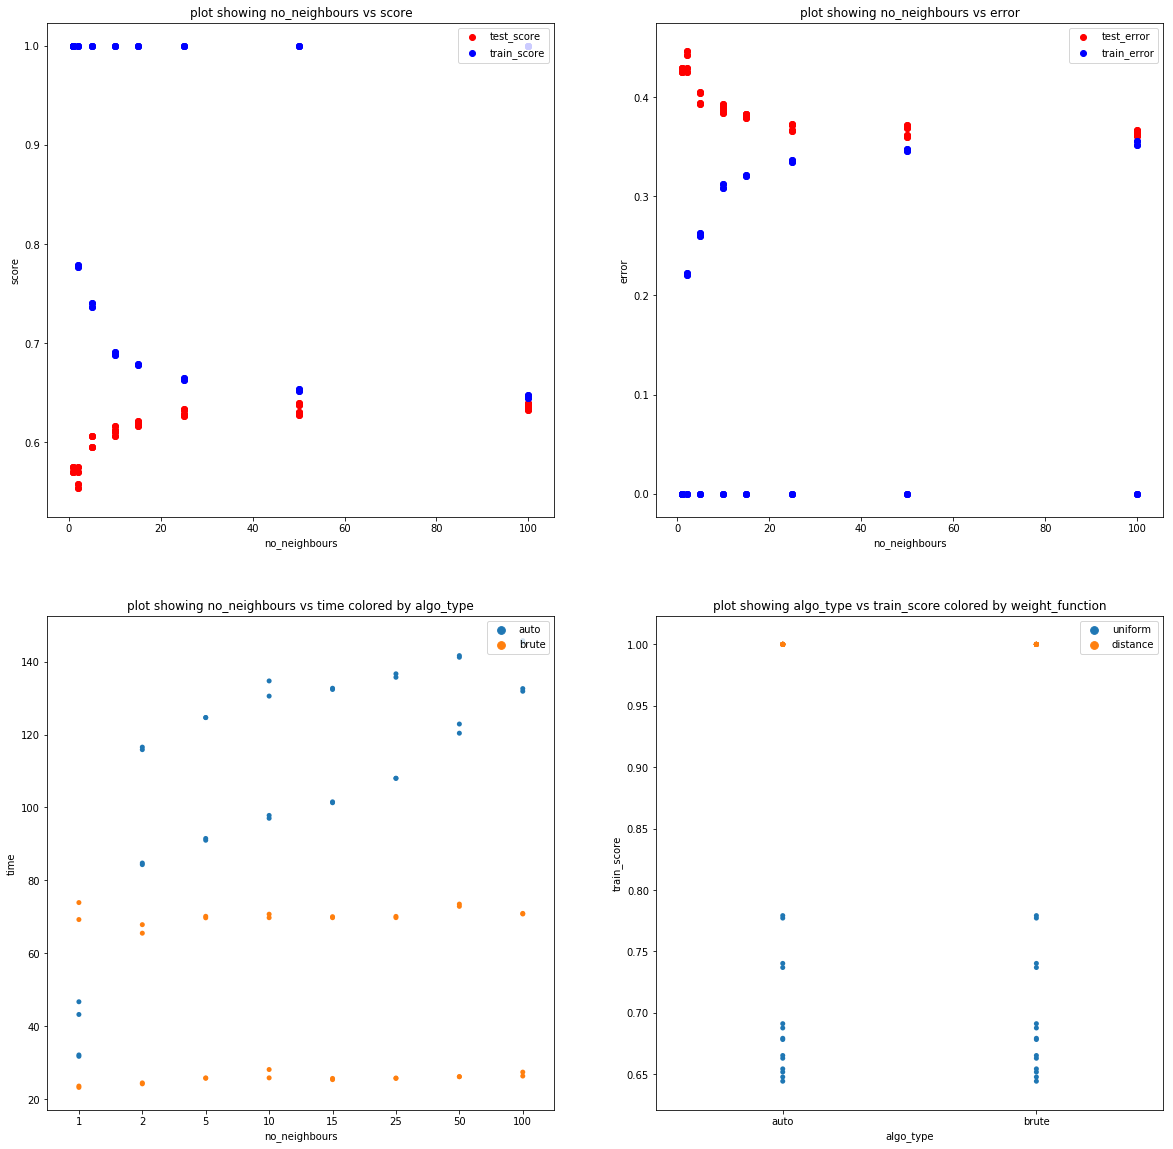

In [134]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter('no_neighbours','test_score',data=df1_knn,color='r')
plt.scatter('no_neighbours','train_score',data=df1_knn,color='b')
plt.xlabel('no_neighbours')
plt.ylabel('score')
plt.title('plot showing no_neighbours vs score')
plt.legend(loc='upper right')
plt.subplot(2,2,2)
plt.scatter('no_neighbours','test_error',data=df1_knn,color='r')
plt.scatter('no_neighbours','train_error',data=df1_knn,color='b')
plt.xlabel('no_neighbours')
plt.ylabel('error')
plt.title('plot showing no_neighbours vs error')
plt.legend(loc='upper right')
plt.subplot(2,2,3)
sns.stripplot('no_neighbours','time',hue='algo_type',data=df1_knn)
plt.xlabel('no_neighbours')
plt.ylabel('time')
plt.title('plot showing no_neighbours vs time colored by algo_type')
plt.legend(loc='upper right')
plt.subplot(2,2,4)
sns.stripplot('algo_type','train_score',hue='weight_function',data=df1_knn)
plt.xlabel('algo_type')
plt.ylabel('train_score')
plt.title('plot showing algo_type vs train_score colored by weight_function')
plt.legend(loc='upper right')

#### Findings:
1. Distance as a weight metric gave a test_score of 1.0 across all parameters suggesting over-fitting
2. From graph 1, at around 50 neighbours, there is very less difference between train and test score and this seems to be the best test_score as evidenced by the output dataframe.
3. With increase in number of neighgbours, brute force algorithm took less time than auto algorithm.

#### ANN with default parameters

In [49]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

xor = Sequential()

# Add required layers
xor.add(Dense(30,input_dim=X_train.shape[1]))
xor.add(Activation('tanh'))
xor.add(Dense(1))
xor.add(Activation("sigmoid"))


xor.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
history = xor.fit(X_train, y_train, epochs=10, verbose=1)
score = xor.evaluate(X_test, y_test)

print("\nLoss: ", score[0])
print("\nAccuracy: ", score[1])

Epoch 1/10
27750/27750 [==============================] - 4s 146us/step - loss: 0.6394 - acc: 0.6368
Epoch 2/10
27750/27750 [==============================] - 3s 113us/step - loss: 0.6316 - acc: 0.6448
Epoch 3/10
27750/27750 [==============================] - 3s 115us/step - loss: 0.6303 - acc: 0.6465
Epoch 4/10
27750/27750 [==============================] - 3s 109us/step - loss: 0.6294 - acc: 0.6475
Epoch 5/10
27750/27750 [==============================] - 3s 105us/step - loss: 0.6285 - acc: 0.6486
Epoch 6/10
27750/27750 [==============================] - 3s 109us/step - loss: 0.6281 - acc: 0.6495
Epoch 7/10
27750/27750 [==============================] - 3s 106us/step - loss: 0.6275 - acc: 0.6501
Epoch 8/10
27750/27750 [==============================] - 3s 109us/step - loss: 0.6271 - acc: 0.6499
Epoch 9/10
27750/27750 [==============================] - 3s 104us/step - loss: 0.6264 - acc: 0.6523
Epoch 10/10
11894/11894 [==============================] - 1s 50us/step

Loss:  0.632777933

#### ANN experimentation with nodes=[20,30,40] activation_func=['sigmoid','relu','tanh'] optimizer=['adam','rmsprop'] batch_size = [32,64] epochs = [10,20,30]

In [ ]:
nodes=[20,30,40]
activation_func=['sigmoid','relu','tanh']
optimizer=['adam','rmsprop']
batch_size = [32,64]
epochs = [10,20,30]

def ANN(nodes,activation_func,optimizer,batch_size,epochs,X_train,y_train,X_test,y_test):
    import time
    time_start=time.clock()
    model2 = Sequential()
    #model2.add(Dense(output_dim=nodes, input_dim=input_d, activation=activation_func))
    model2.add(Dense(output_dim = int(nodes), activation = activation_func, input_dim = 58))
        
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model2.fit(X_train, y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2, verbose=0)
    score = model2.evaluate(X_test, y_test)
    S_test=score[1]
    S_loss=score[0]
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    test_score.append(S_test)
    test_loss.append(S_loss)
    nodes_.append(nodes)
    activation_func_.append(activation_func)
    optimizer_.append(optimizer)
    batch_size_.append(batch_size)
    epochs_.append(epochs)
    return print(es)

In [ ]:
test_score=[]
time_taken=[]
test_loss=[]
nodes_=[]
activation_func_=[]
optimizer_=[]
batch_size_=[]
epochs_=[]
                
for es in epochs:    
    for bs in batch_size:
        for af in activation_func:
            for opti in optimizer:
                  for node in nodes:
                    ANN(node,af,opti,bs,es,X_train,y_train,X_test,y_test)

df1_ANN=pd.DataFrame()
df1_ANN['nodes']=nodes_
df1_ANN['activation_function']=activation_func_
df1_ANN['optimizer']=optimizer_
df1_ANN['batch_size']=batch_size_
df1_ANN['epochs']=epochs_
df1_ANN['loss']=test_loss
df1_ANN['test_score']=test_score
df1_ANN['time']=time_taken


In [4]:
df1_ANN.head()

,Unnamed: 0,nodes,activation_function,optimizer,batch_size,epochs,loss,test_score,time
0,0,20,sigmoid,adam,32,10,0.634747,0.641836,14.277220
1,1,30,sigmoid,adam,32,10,0.634708,0.643770,14.636226
2,2,40,sigmoid,adam,32,10,0.635128,0.642425,14.449010
3,3,20,sigmoid,rmsprop,32,10,0.634617,0.643686,14.165706
4,4,30,sigmoid,rmsprop,32,10,0.634930,0.643350,14.462807


#### DataFrame containing top 5 test scores

In [24]:
(df1_ANN.sort_values(by='test_score',ascending=False)).head(5)

,Unnamed: 0,nodes,activation_function,optimizer,batch_size,epochs,loss,test_score,time
83,83,40,relu,rmsprop,32,30,0.621184,0.659240,55.839856
99,99,20,relu,rmsprop,64,30,0.620592,0.656802,31.981538
43,43,30,relu,adam,32,20,0.619754,0.655288,34.197620
45,45,20,relu,rmsprop,32,20,0.623814,0.655204,34.239992
97,97,30,relu,adam,64,30,0.619613,0.654868,36.990686


#### Findings:
1. The best test score is 65.9 with hyoer paramters of 40 nodes, relu as activation function of hidden layer , rmrprop as optimizer and batch size of 32.
2. The computational time for best iteration is  secs.

#### Plots containing comparision of various hyperparamaters

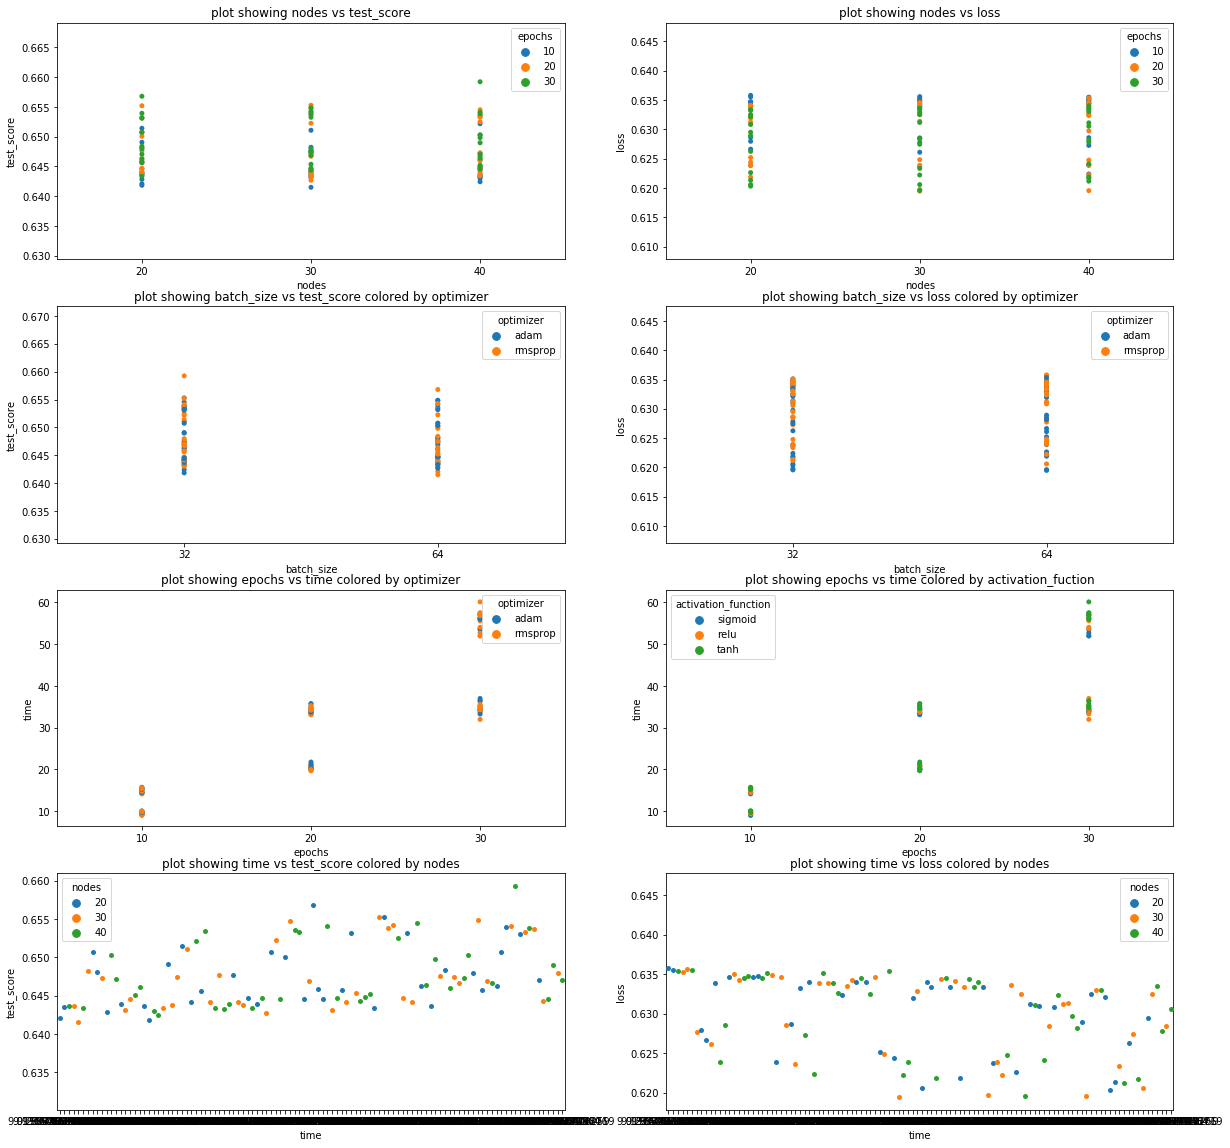

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.stripplot('nodes','test_score',hue='epochs',data=df1_ANN)
plt.xlabel('nodes')
plt.ylabel('test_score')
plt.title('plot showing nodes vs test_score')
plt.subplot(4,2,2)
sns.stripplot('nodes','loss',hue='epochs',data=df1_ANN)
plt.xlabel('nodes')
plt.ylabel('loss')
plt.title('plot showing nodes vs loss')
plt.subplot(4,2,3)
sns.stripplot('batch_size','test_score',hue='optimizer',data=df1_ANN)
plt.xlabel('batch_size')
plt.ylabel('test_score')
plt.title('plot showing batch_size vs test_score colored by optimizer')
plt.subplot(4,2,4)
sns.stripplot('batch_size','loss',hue='optimizer',data=df1_ANN)
plt.xlabel('batch_size')
plt.ylabel('loss')
plt.title('plot showing batch_size vs loss colored by optimizer')
plt.subplot(4,2,5)
sns.stripplot('epochs','time',hue='optimizer',data=df1_ANN)
plt.xlabel('epochs')
plt.ylabel('time')
plt.title('plot showing epochs vs time colored by optimizer')
plt.subplot(4,2,6)
sns.stripplot('epochs','time',hue='activation_function',data=df1_ANN)
plt.xlabel('epochs')
plt.ylabel('time')
plt.title('plot showing epochs vs time colored by activation_fuction')
plt.subplot(4,2,7)
sns.stripplot('time','test_score',hue='nodes',data=df1_ANN)
plt.xlabel('time')
plt.ylabel('test_score')
plt.title('plot showing time vs test_score colored by nodes')
plt.subplot(4,2,8)
sns.stripplot('time','loss',hue='nodes',data=df1_ANN)
plt.xlabel('time')
plt.ylabel('loss')
plt.title('plot showing time vs loss colored by nodes')
plt.show()

#### Findings:
1. There is a general upward trend in test_score as time increases with more number of nodes achieving better results.
2. There is a general downward trend in loss as time increases with 30 nodes achieving better results.
3. msprop takes more time compared to adam
4. tanh activation function is computationally expensive compared to sigmoid and ReLU
5. msprop achieved test_score compared to adam optimizer.
6. With increasing number of nodes theres is increase in test_score 
7. Increasing batch size decreased test score

### Second data set

In [77]:
data1=pd.read_csv('census.csv')

In [78]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [79]:
data1.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [80]:
income_raw = data1['income']
features_raw = data1.drop('income', axis = 1)

In [81]:
#log transforming numerical money features capital-gain and capital-loss. Added 1 as some values are 0.
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data1[skewed].apply(lambda x: np.log(x + 1))

In [82]:
#Scaling of numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data1[numerical])

#### Task 1: conversion of income to two classes based on whether its greater than 50k.
As variables like work class, education_level, sex etc are categorical, they are converted to dummy variables and one dummy variable is dropped for each original variable to get rid of dummy trap 

In [83]:
features1 = pd.get_dummies(features_raw,drop_first=True)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

#### Task3: Dividing data into test and train sets.

In [84]:
# Splitting data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, income, test_size=0.3, random_state=123)

#### Implementing knn algo for secind dataset with default parameters

In [85]:
import time
time_start=time.clock()
model2_1=KNeighborsClassifier()
model2_1.fit(X_train1,y_train1)
y_pred1=model2_1.predict(X_test1)
accuracy=accuracy_score(y_test1,y_pred1)
time_elapsed = (time.clock() - time_start)
print(accuracy, time_elapsed)

0.8211837546989017 24.78530297436373


In [91]:
def knn(n,weight,algo,metric,X_train,y_train,X_test,y_test):
    import time
    time_start=time.clock()
    model1=KNeighborsClassifier(n_neighbors = n, weights = weight, algorithm = algo, p = metric )
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    neighbours.append(n)
    weight_function.append(weight)
    algo_type.append(algo)
    dist_metric.append(metric)
    print(n,weight,algo,metric,S_test,time_elapsed)

#### Experimentation of knn with metrics n=[1,2,5,10,15,25,50,100] weights=['uniform','distance'] algorithms=['auto'] metrics = [1,2]

In [92]:
n=[1,2,5,10,15,25,50,100]
weights=['uniform','distance']
algorithms=['auto']
metrics = [1,2]
train_score=[]
test_score=[]
time_taken=[]
neighbours=[]
weight_function=[]
algo_type=[]
dist_metric=[]
for n in n:
    for weight in weights:
        for algo in algorithms:
            for metric in metrics:
                knn(n,weight,algo,metric,X_train1,y_train1,X_test1,y_test1)
df2_knn=pd.DataFrame()
df2_knn['no_neighbours']=neighbours
df2_knn['weight_function']=weight_function
df2_knn['algo_type']=algo_type
df2_knn['dist_metric']=dist_metric
df2_knn['train_score']=train_score
df2_knn['test_score']=test_score
df2_knn['train_error']=1-df2_knn['train_score']
df2_knn['test_error']=1-df2_knn['test_score']
df2_knn['time']=time_taken

1 uniform auto 1 0.7908159504680474 36.51363200000196
1 uniform auto 2 0.7887521191125525 43.633805538462184
1 distance auto 1 0.7908159504680474 37.8045300512822
1 distance auto 2 0.7887521191125525 43.78889189743495
2 uniform auto 1 0.8088744748286283 50.81892841025547
2 uniform auto 2 0.8076214343627921 63.023345641027845
2 distance auto 1 0.7948699049163411 49.21638276923477
2 distance auto 2 0.7927323652981499 55.483887179485464
5 uniform auto 1 0.8231001695290042 65.07676717948925
5 uniform auto 2 0.8211837546989017 77.01374810256675
5 distance auto 1 0.8125598879634407 68.80648041025415
5 distance auto 2 0.8099063905063758 87.32140553845966
10 uniform auto 1 0.8314292032136803 97.44425682051224
10 uniform auto 2 0.8309132453748065 114.46440697435901
10 distance auto 1 0.8188250902926218 103.18559384615946
10 distance auto 2 0.8164664258863419 109.42024615384435
15 uniform auto 1 0.8354831576619739 90.75073107692151
15 uniform auto 2 0.8332719097810865 106.10538338461629
15 dista

In [93]:
df2_knn['time'].sum()

3210.7213362051407

#### Dataframe showing the top 5 test scores of knn for second dataset

In [94]:
(df2_knn.sort_values(by='test_score',ascending=False)).head(5)

,no_neighbours,weight_function,algo_type,dist_metric,train_score,test_score,train_error,test_error,time
16,15,uniform,auto,1,0.848334,0.835483,0.151666,0.164517,90.750731
21,25,uniform,auto,2,0.842774,0.833419,0.157226,0.166581,120.957278
20,25,uniform,auto,1,0.843563,0.833419,0.156437,0.166581,104.941552
17,15,uniform,auto,2,0.847860,0.833272,0.152140,0.166728,106.105383
28,100,uniform,auto,1,0.832444,0.833198,0.167556,0.166802,159.807741


#### Findings:
1. The best test score is 83.54 with 15 neighbours, auto algorithms and dist metric of 1
2. Computational time for best metric is 90.75 secs.

#### Plots showing comparisions of various hyperparameters

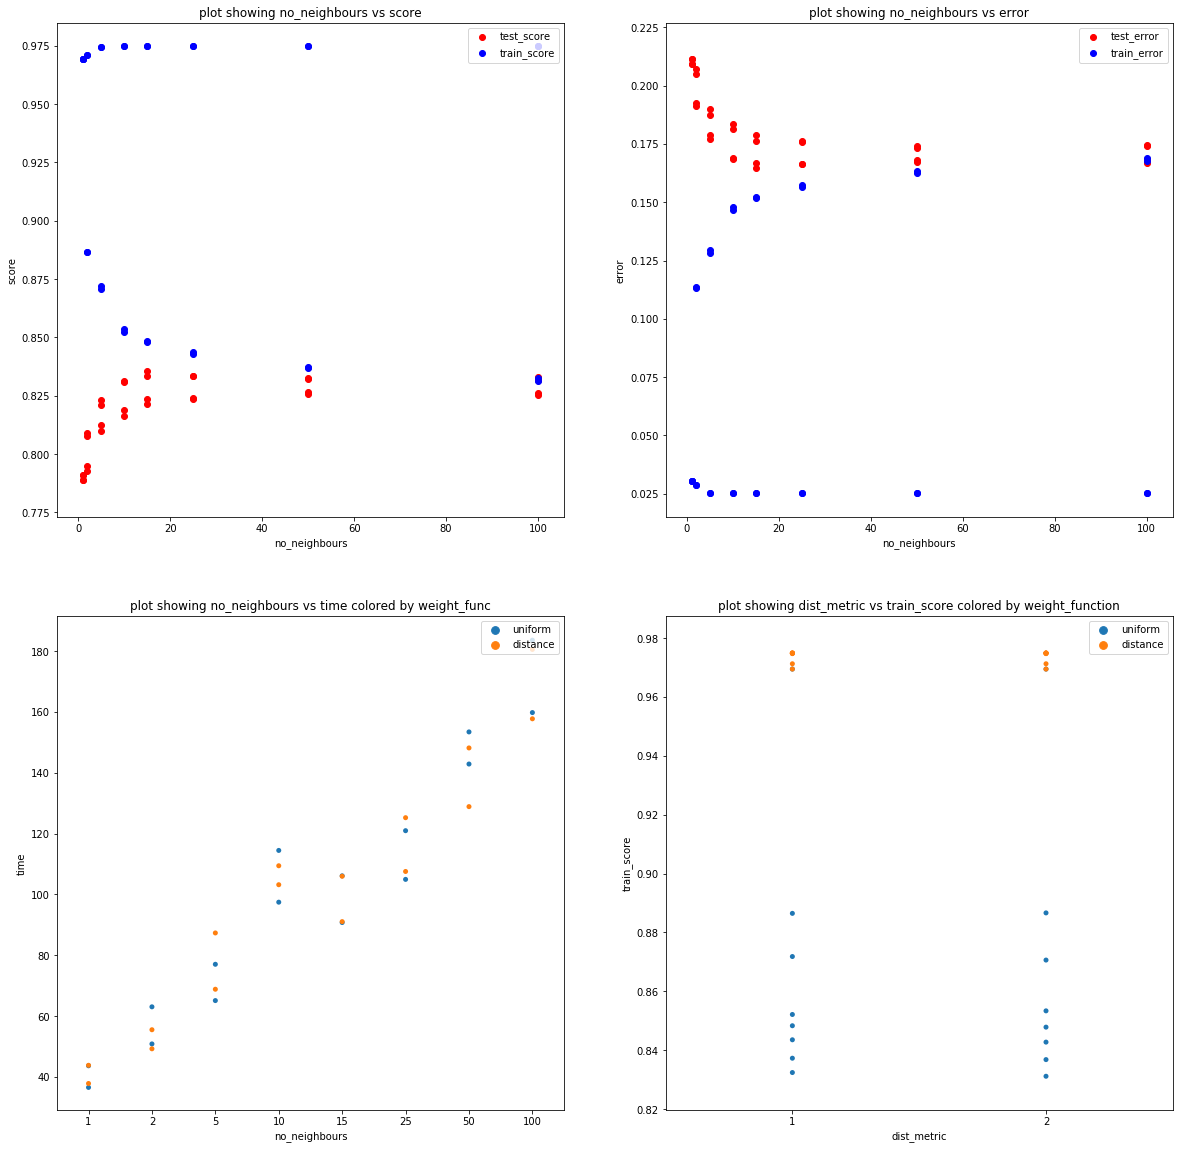

In [138]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter('no_neighbours','test_score',data=df2_knn,color='r')
plt.scatter('no_neighbours','train_score',data=df2_knn,color='b')
plt.xlabel('no_neighbours')
plt.ylabel('score')
plt.title('plot showing no_neighbours vs score')
plt.legend(loc='upper right')
plt.subplot(2,2,2)
plt.scatter('no_neighbours','test_error',data=df2_knn,color='r')
plt.scatter('no_neighbours','train_error',data=df2_knn,color='b')
plt.xlabel('no_neighbours')
plt.ylabel('error')
plt.title('plot showing no_neighbours vs error')
plt.legend(loc='upper right')
plt.subplot(2,2,3)
sns.stripplot('no_neighbours','time',hue='weight_function',data=df2_knn)
plt.xlabel('no_neighbours')
plt.ylabel('time')
plt.title('plot showing no_neighbours vs time colored by weight_func')
plt.legend(loc='upper right')
plt.subplot(2,2,4)
sns.stripplot('dist_metric','train_score',hue='weight_function',data=df2_knn)
plt.xlabel('dist_metric')
plt.ylabel('train_score')
plt.title('plot showing dist_metric vs train_score colored by weight_function')
plt.legend(loc='upper right')
plt.show()

#### Findings:
1. Distance as a weight metric gave a test_score of !.98 across all parameters suggesting over-fitting
2. From graph 1, at around 15 neighbours, there is very less difference between train and test score and this seems to be the best test_score as evidenced by the output dataframe.
3. With increase in number of neighgbours, both uniform and distance weight metrics increased in computational time proportionally.

#### Implementation of artificial neural network with default parameters.

In [95]:
xor1 = Sequential()

# Add required layers
xor1.add(Dense(30,input_dim=X_train1.shape[1]))
xor1.add(Activation('tanh'))
xor1.add(Dense(1))
xor1.add(Activation("sigmoid"))


xor1.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
history = xor1.fit(X_train1, y_train1, epochs=10, verbose=1)
score = xor1.evaluate(X_test1, y_test1)

print("\nLoss: ", score[0])
print("\nAccuracy: ", score[1])

Epoch 1/10
31655/31655 [==============================] - 13s 417us/step - loss: 0.3810 - acc: 0.8222
Epoch 2/10
31655/31655 [==============================] - 4s 129us/step - loss: 0.3477 - acc: 0.8387
Epoch 3/10
31655/31655 [==============================] - 4s 132us/step - loss: 0.3394 - acc: 0.8431
Epoch 4/10
31655/31655 [==============================] - 4s 122us/step - loss: 0.3339 - acc: 0.8459
Epoch 5/10
31655/31655 [==============================] - 4s 128us/step - loss: 0.3311 - acc: 0.8453
Epoch 6/10
31655/31655 [==============================] - 4s 129us/step - loss: 0.3301 - acc: 0.8468
Epoch 7/10
31655/31655 [==============================] - 4s 126us/step - loss: 0.3285 - acc: 0.8464
Epoch 8/10
31655/31655 [==============================] - 4s 129us/step - loss: 0.3278 - acc: 0.8474
Epoch 9/10
31655/31655 [==============================] - 4s 128us/step - loss: 0.3272 - acc: 0.8475
Epoch 10/10
13567/13567 [==============================] - 1s 57us/step

Loss:  0.32496212

In [98]:
X_train1.shape[1]

95

In [107]:
nodes=[40,50,60]
activation_func=['sigmoid','relu','tanh']
optimizer=['adam','rmsprop']
batch_size = [32,64]
epochs = [10,20,30]

def ANN(nodes,activation_func,optimizer,batch_size,epochs,X_train,y_train,X_test,y_test):
    import time
    time_start=time.clock()
    model2 = Sequential()
    #model2.add(Dense(output_dim=nodes, input_dim=input_d, activation=activation_func))
    model2.add(Dense(output_dim = int(nodes), activation = activation_func, input_dim = 95))
        
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model2.fit(X_train, y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2, verbose=0)
    score = model2.evaluate(X_test, y_test)
    S_test=score[1]
    S_loss=score[0]
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    test_score.append(S_test)
    test_loss.append(S_loss)
    nodes_.append(nodes)
    activation_func_.append(activation_func)
    optimizer_.append(optimizer)
    batch_size_.append(batch_size)
    epochs_.append(epochs)
    return print(es)

#### Experimentation of ANN for second dataset with nodes=[40,50,60] activation_func=['sigmoid','relu','tanh'] optimizer=['adam','rmsprop'] batch_size = [32,64] epochs = [10,20,30]

In [108]:
test_score=[]
time_taken=[]
test_loss=[]
nodes_=[]
activation_func_=[]
optimizer_=[]
batch_size_=[]
epochs_=[]
                
for es in epochs:    
    for bs in batch_size:
        for af in activation_func:
            for opti in optimizer:
                  for node in nodes:
                    ANN(node,af,opti,bs,es,X_train1,y_train1,X_test1,y_test1)

df2_ANN=pd.DataFrame()
df2_ANN['nodes']=nodes_
df2_ANN['activation_function']=activation_func_
df2_ANN['optimizer']=optimizer_
df2_ANN['batch_size']=batch_size_
df2_ANN['epochs']=epochs_
df2_ANN['loss']=test_loss
df2_ANN['test_score']=test_score
df2_ANN['time']=time_taken


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=95, units=40)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 78us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=95, units=50)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 84us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=95, units=60)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 85us/step
10
13567/13567 [==============================] - 1s 84us/step
10
13567/13567 [==============================] - 1s 89us/step
10
13567/13567 [==============================] - 1s 89us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=95, units=40)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 84us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=95, units=50)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 88us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=95, units=60)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 86us/step
10
13567/13567 [==============================] - 1s 89us/step
10
13567/13567 [==============================] - 1s 102us/step
10
13567/13567 [==============================] - 1s 94us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=95, units=40)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 90us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=95, units=50)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 94us/step
10


C:\Users\pvloh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=95, units=60)`
  if sys.path[0] == '':


13567/13567 [==============================] - 1s 83us/step
10
13567/13567 [==============================] - 1s 84us/step
10
13567/13567 [==============================] - 1s 86us/step
10
13567/13567 [==============================] - 1s 101us/step
10
13567/13567 [==============================] - 1s 99us/step
10
13567/13567 [==============================] - 2s 121us/step
10
13567/13567 [==============================] - 1s 87us/step
10
13567/13567 [==============================] - 1s 85us/step
10
13567/13567 [==============================] - 1s 86us/step
10
13567/13567 [==============================] - 1s 89us/step
10
13567/13567 [==============================] - 1s 91us/step
10
13567/13567 [==============================] - 1s 99us/step
10
13567/13567 [==============================] - 1s 95us/step
10
13567/13567 [==============================] - 1s 90us/step
10
13567/13567 [==============================] - 1s 102us/step
10
13567/13567 [==============================] - 1s 91

In [112]:
df2_ANN.head()

,nodes,activation_function,optimizer,batch_size,epochs,loss,test_score,time
0,40,sigmoid,adam,32,10,0.329466,0.846613,49.066179
1,50,sigmoid,adam,32,10,0.331178,0.845655,47.948030
2,60,sigmoid,adam,32,10,0.328659,0.846023,51.820209
3,40,sigmoid,rmsprop,32,10,0.340311,0.840422,49.959008
4,50,sigmoid,rmsprop,32,10,0.340527,0.841159,50.085554


#### Dataframe containing top 5 test score for ANN algo second daataset

In [113]:
(df2_ANN.sort_values(by='test_score',ascending=False)).head(5)

,nodes,activation_function,optimizer,batch_size,epochs,loss,test_score,time
78,40,relu,adam,32,30,0.324290,0.850446,158.545685
96,40,relu,adam,64,30,0.324695,0.850151,85.951969
99,40,relu,rmsprop,64,30,0.328031,0.849856,87.425090
84,40,tanh,adam,32,30,0.321702,0.849856,158.453914
79,50,relu,adam,32,30,0.328351,0.849340,159.998654


#### Findings:
1. The best test_score is 85.05 with 40 nodes, relu as hidden layer activation function, adam optimizer, 30 epochs and 32 batch size.
2. The best test score iteration took a computational time of 158 secs.
3. The second best test score is 85.01 with a computational time of 85 seconds, about half of the best test score time.
4. Decrease in batch size decreases computational time with everything else the same

#### Plots showing comparision across various hyperparameters

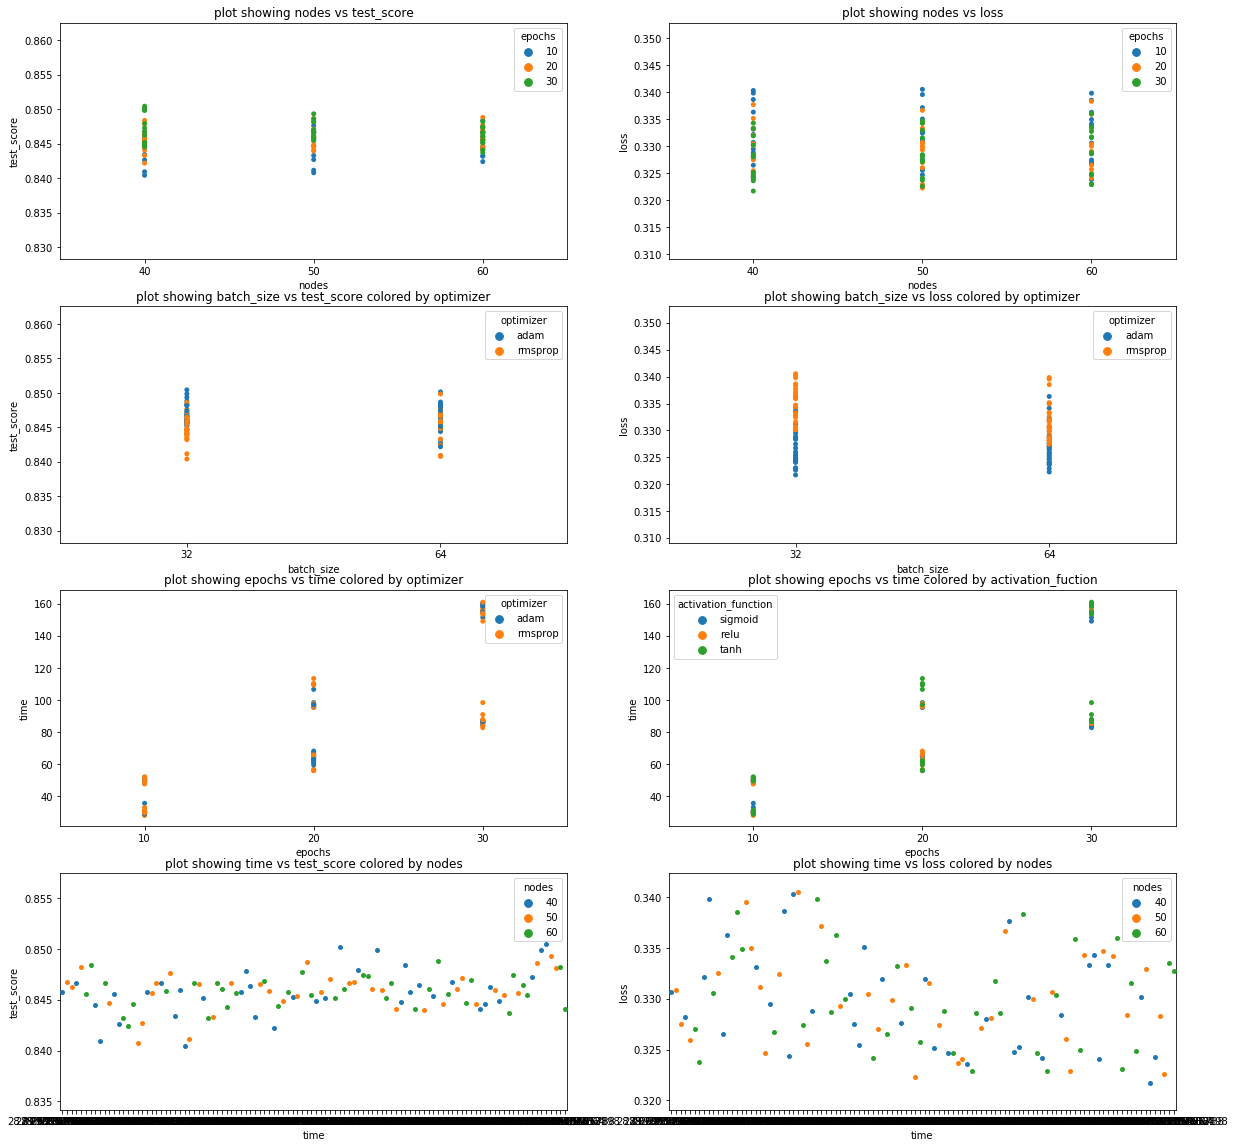

In [114]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.stripplot('nodes','test_score',hue='epochs',data=df2_ANN)
plt.xlabel('nodes')
plt.ylabel('test_score')
plt.title('plot showing nodes vs test_score')
plt.subplot(4,2,2)
sns.stripplot('nodes','loss',hue='epochs',data=df2_ANN)
plt.xlabel('nodes')
plt.ylabel('loss')
plt.title('plot showing nodes vs loss')
plt.subplot(4,2,3)
sns.stripplot('batch_size','test_score',hue='optimizer',data=df2_ANN)
plt.xlabel('batch_size')
plt.ylabel('test_score')
plt.title('plot showing batch_size vs test_score colored by optimizer')
plt.subplot(4,2,4)
sns.stripplot('batch_size','loss',hue='optimizer',data=df2_ANN)
plt.xlabel('batch_size')
plt.ylabel('loss')
plt.title('plot showing batch_size vs loss colored by optimizer')
plt.subplot(4,2,5)
sns.stripplot('epochs','time',hue='optimizer',data=df2_ANN)
plt.xlabel('epochs')
plt.ylabel('time')
plt.title('plot showing epochs vs time colored by optimizer')
plt.subplot(4,2,6)
sns.stripplot('epochs','time',hue='activation_function',data=df2_ANN)
plt.xlabel('epochs')
plt.ylabel('time')
plt.title('plot showing epochs vs time colored by activation_fuction')
plt.subplot(4,2,7)
sns.stripplot('time','test_score',hue='nodes',data=df2_ANN)
plt.xlabel('time')
plt.ylabel('test_score')
plt.title('plot showing time vs test_score colored by nodes')
plt.subplot(4,2,8)
sns.stripplot('time','loss',hue='nodes',data=df2_ANN)
plt.xlabel('time')
plt.ylabel('loss')
plt.title('plot showing time vs loss colored by nodes')
plt.show()

#### Findings:
1. There is a general upward trend in test_score as time increases with more number of nodes achieving better results.
2. There is a no apparent relation between time and loss as compared to nodes
3. msprop takes more time compared to adam
4. tanh activation function is computationally expensive compared to sigmoid and ReLU
5. msprop achieved better test_scores on average compared to adam optimizer.
6. With increasing number of nodes theres is decrease in test_score with 40 nodes achieving the best score  
7. Increasing batch size decreased test score

#### Conclusions:
1. For both the datasets adaboost is the best with scores of 66.38(dataset1) and 86.8(dataset2).
2. For dataset 1, adaboost time taken is 289 seconds compared to 141 secs-KNN and 55secs-ANN, making it computationally very expensive.
3. For dataset 2, adaboost time taken is 86.8 seconds compared to 90 secs-KNN and  158.54secs-ANN, making it the least computationally expensive algorithm.
4. Things that could imporve the modelling - modelling by cross validation in K nearest neighbours, using other hyperparameters like dropout in Artificial Neural networks.


#### Refrences:
1. https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw -  This is the basis on which number of hidden layers and number of neurons in hidden layers were choosen.
2. http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
4. https://www.datacamp.com/community/tutorials/deep-learning-python
5. http://scikit-learn.org/stable/